<a href="https://colab.research.google.com/github/khushi-dugar/Python_Labs/blob/main/Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

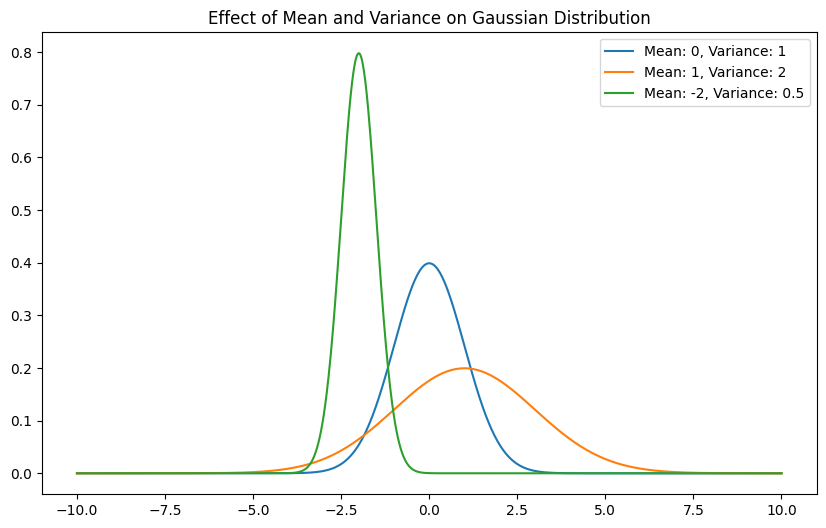

In [1]:
#1. Compute Gaussian Distribution and Plot Effects of Varying Mean and Variance
import numpy as np
import matplotlib.pyplot as plt

def gaussian_distribution(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(-10, 10, 1000)
means = [0, 1, -2]
variances = [1, 2, 0.5]

plt.figure(figsize=(10, 6))
for mu, sigma in zip(means, variances):
    plt.plot(x, gaussian_distribution(x, mu, sigma), label=f"Mean: {mu}, Variance: {sigma}")

plt.title("Effect of Mean and Variance on Gaussian Distribution")
plt.legend()
plt.show()


In [2]:
#2. Linear Regression
import numpy as np

def linear_regression(X, y):
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # Normal equation
    return theta

# Example usage
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

theta = linear_regression(X, y)
print("Coefficients:", theta)


Coefficients: [0. 2.]


In [3]:
#3. Gradient Descent
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
    return theta

# Example usage
X = np.c_[np.ones(4), np.array([1, 2, 3, 4])]  # Add bias term
y = np.array([2, 4, 6, 8])

theta = gradient_descent(X, y)
print("Coefficients:", theta)


Coefficients: [0.03040452 1.98965876]


In [4]:
#4. Classify Flower Images Using MLP (Multi-Layer Perceptron)
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train MLP
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
mlp.fit(X_train, y_train)

# Test MLP
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [18]:
#5. Classify Flower Images Using SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

accuracy = svm.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9777777777777777


In [20]:
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=(4, 1, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node sequential_10_1/conv2d_10_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](data, sequential_10_1/conv2d_10_1/convolution/ReadVariableOp)' with input shapes: [?,4,1,1], [2,2,1,32].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 4, 1, 1), dtype=float32)

In [22]:
#7.Write a python program to classify different handwritten character images using the SVM classifier.
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  1  0 45  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 38]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       

In [26]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

faces = fetch_olivetti_faces()
X = faces.data
y = faces.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 64, 64, 1)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 1)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=40)
y_test = to_categorical(y_test, num_classes=40)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')



Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 0.0273 - loss: 3.6903 - val_accuracy: 0.0000e+00 - val_loss: 3.6909
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.0211 - loss: 3.6886 - val_accuracy: 0.0000e+00 - val_loss: 3.6925
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.0268 - loss: 3.6883 - val_accuracy: 0.0000e+00 - val_loss: 3.6942
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.0343 - loss: 3.6875 - val_accuracy: 0.0000e+00 - val_loss: 3.6962
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.0457 - loss: 3.6873 - val_accuracy: 0.0000e+00 - val_loss: 3.6984
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.0357 - loss: 3.6878 - val_accuracy: 0.0000e+00 - val_loss: 3.7004
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.0377 - loss: 3.6852 - val_accuracy: 0.0000e+00 - val_loss: 3.7032
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.0298 - los

In [27]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, DenseNet201
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

X = np.load('histopathology_images.npy')
y = np.load('histopathology_labels.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

vgg_model = Sequential()
vgg_model.add(VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
vgg_model.add(GlobalAveragePooling2D())
vgg_model.add(Dense(1, activation='sigmoid'))
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

densenet_model = Sequential()
densenet_model.add(DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
densenet_model.add(GlobalAveragePooling2D())
densenet_model.add(Dense(1, activation='sigmoid'))
densenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

vgg_model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping])
densenet_model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping])

vgg_loss, vgg_accuracy = vgg_model.evaluate(test_generator)
densenet_loss, densenet_accuracy = densenet_model.evaluate(test_generator)

print(f'VGG16 Accuracy: {vgg_accuracy}')
print(f'DenseNet201 Accuracy: {densenet_accuracy}')


FileNotFoundError: [Errno 2] No such file or directory: 'histopathology_images.npy'